In [1]:
from IPython.display import HTML

HTML('''
<script>
    function toggle_cell(cell) {
        var cell = $(cell);
        var input = cell.find(".input");
        if (input.is(":visible")) {
            input.hide();
        } else {
            input.show();
        }
    }

    function add_toggle_button() {
        // Supprimer tous les boutons existants pour éviter les doublons
        $(".toggle-code-button").remove();
        
        // Ajouter un nouveau bouton "Toggle Code" pour chaque cellule de code
        $(".input").each(function() {
            $(this).before('<button class="toggle-code-button" onclick="toggle_cell(this.parentNode)">Plier/Deplier code</button>');
        });
    }

    $(document).ready(add_toggle_button);
</script>
''')

                                                 Rapport de Mini Projet 

                                Master 2 Télédétection et Géomatique Appliquées à l’Environnement 

                                    Thème : Comparaison simulations par Arome et observations météo


                                                        Réaliser par:
                                                        
                                       Boubacar BAH / Numéro étudiant : XXXXXX
                                       Prodjinotho Anselme / Numéro étudiant : XXXXXX
                                       

                                       Sous la supervision de : Madame Malika Madelin


## Introduction
Les modèles météorologiques jouent un rôle clé dans la prévision du temps et l’analyse des conditions atmosphériques. Parmi eux, AROME, développé par Météo-France, est conçu pour fournir des prévisions à haute résolution spatiale et temporelle, principalement sur la France et ses territoires d’outre-mer. Ses données, disponibles sous le format GRIB, sont essentielles pour les météorologues et les chercheurs souhaitant étudier les phénomènes météorologiques à une échelle locale. Cependant, comme tout modèle numérique, AROME repose sur des approximations et des hypothèses qui nécessitent une évaluation rigoureuse afin d’en mesurer la fiabilité et d’identifier d’éventuelles divergences avec les observations réelles.
Ce projet a pour objectif de comparer les prévisions du modèle AROME aux mesures issues des stations météorologiques de Météo-France, en mettant en place une méthodologie d’acquisition et de traitement de données automatisée. L’analyse se fera à un pas de temps horaire et portera principalement sur la température. Elle sera appliquée sur une zone d’étude couvrant cinq régions : Ile de france Hauts de france, Grand Est, Centre Val de lOire et Bourgogne Franche-Comte l’enjeu ici est donc de mieux comprendre les performances des prédictions d'AROME. 


## 1. Le format de données AROME 
Le format AROME est un modèle de prévision météorologique qui utilise une grille fine pour simuler l'atmosphère. Il est basé sur un système de maillage tridimensionnel qui permet de capturer des détails à une échelle de quelques kilomètres. Le modèle AROME est particulièrement adapté pour les prévisions à court terme (jusqu'à 48 heures) et pour des phénomènes météorologiques locaux tels que les orages, les brouillards, et les précipitations intenses.
Le format de données AROME inclut des variables météorologiques telles que la température, l'humidité, la pression atmosphérique, la vitesse et la direction du vent, ainsi que les précipitations. Ces données sont stockées dans des fichiers structurés selon des normes spécifiques, souvent au format GRIB (GRIdded Binary) ou NetCDF (Network Common Data Form), qui sont des formats standardisés pour les données météorologiques.


## 2. Le fonctionnement du format AROME 
Le modèle AROME fonctionne en intégrant les équations fondamentales de la dynamique des fluides et de la thermodynamique pour simuler l'évolution de l'atmosphère. Voici les étapes clés de son fonctionnement :
- **L’initialisation :** Le modèle AROME commence par une phase d'initialisation où les conditions initiales de l'atmosphère sont définies. Ces conditions sont souvent dérivées de modèles à plus grande échelle, comme le modèle ARPEGE (Action de Recherche Petite Echelle Grande Echelle), également développé par Météo-France.
- **La simulation :** Le modèle utilise ensuite une grille fine pour résoudre les équations météorologiques. La résolution spatiale typique d'AROME est de 1.3 km, ce qui permet de capturer des détails fins tels que les reliefs locaux et les effets de surface.
- **L’assimilation de données :** AROME intègre des observations en temps réel, telles que les données des satellites, des radars, et des stations météorologiques, pour améliorer la précision des prévisions. Cette étape est cruciale pour ajuster les prévisions en fonction des conditions actuelles.
- **La production de prévisions :** Le modèle génère des prévisions pour des variables météorologiques spécifiques, qui sont ensuite stockées dans des fichiers au format AROME. Ces fichiers peuvent être visualisés et analysés par les météorologues et les chercheurs.



## 3. Les cas d’étude 
Le format AROME a été largement utilisé dans la recherche météorologique pour étudier divers phénomènes atmosphériques :
Une étude menée par Ducrocq et al. (2014) a utilisé le modèle AROME pour analyser les épisodes de précipitations intenses dans le sud de la France. Les chercheurs ont pu identifier les mécanismes atmosphériques responsables de ces événements extrêmes, ce qui a permis d'améliorer les prévisions et les alertes météorologiques. 
Bresson et al. (2012) ont démontré l'efficacité des données AROME dans la prévision des orages localisés. En utilisant ces données, les chercheurs ont pu prédire avec précision la formation et l'évolution des cellules orageuses, ce qui est crucial pour la sécurité publique. 
Pour étudier l'impact des îlots de chaleur urbains sur les températures locales, une étude de Masson et al. (2013) a utilisé les données AROME. Les résultats ont montré que le modèle AROME est capable de capturer les variations de température dues à l'urbanisation, ce qui est important pour la planification urbaine et la gestion des risques liés à la chaleur.
Le format de données AROME est un outil puissant pour la prévision météorologique à haute résolution. Il permet de capturer des détails fins de l'atmosphère et d'améliorer les prévisions locales. Grâce à son utilisation par les chercheurs, AROME contribue à une meilleure compréhension des phénomènes météorologiques complexes et à l'amélioration des systèmes d'alerte. 


## 4. Matériels et méthodes
 Cette section présente les différents matériels utilisés dans ce travail, ainsi que les méthodologies d'analyse et de comparaison des données d'observation et du modèle AROME. Elle inclut notamment des analyses statistiques quantitatives et qualitatives. 
### 4-a Matériels 
Dans ce travail, nous utiliserons le logiciel R et le langage de programmation Python dans l’environnement Jupyter Notebook pour un traitement automatisé des données. L'extraction des données de température au format GRIB2 a été effectuée à l'aide du package gribr de R, qui dépend des packages ECMWF ecCodes (version 2.19.0) et proj4 de R. Les packages gribr et ecCodes n'étant pas disponibles pour le système Windows, un environnement Unix a été installé via Cygwin. Après la configuration des différentes bibliothèques, l'ensemble des traitements a été effectué dans JupyterLab, un environnement interactif dédié à l'analyse des données. 
### 4-b Méthodes
Dans ce travail nous allons faire une analyse statistique comparative entre les données de températures observées par les stations d’observations et celles prédites par le modèle AROME. 
Nous allons faire une analyse des indicateurs statistiques quantitatives tels-que la comparaison des moyennes horaires des températures, l’erreur moyenne quadratique relative « RMSE » ainsi que le biais.
L'acquisition des données a été réalisée via les API packageArome pour les données Arome et packageObservations pour les données d'observations de Météo-France. Le choix de télécharger les données Arome via l'API a été motivé par le fait que les données Arome sont disponibles uniquement en temps réel, c'est-à-dire que le modèle Arome prédit toutes les 3 heures et, après chaque prédiction, les données précédentes ne sont plus accessibles pour les utilisateurs, sauf demande spécifique auprès des services de Météo-France concernés. C'est pour cette raison que nous avons mis en place un script pour récupérer les données chaque jour pendant le projet. En ce qui concerne les données d'observations, bien que les anciennes données soient disponibles, elles ne sont pas utiles dans ce travail, car les données Arome correspondantes ne sont pas à notre disposition pour faire des comparaisons. C'est pourquoi un script Python a été mis en place pour récupérer les données d'observations horaires quotidiennes. 
Les données Arome couvrent la France métropolitaine et les départements d'outre-mer. La comparaison a été réalisée en extrayant les données de température des pixels qui se superposent avec la localisation des stations. Les données sur les stations (localisations) ont été téléchargées sur le site web de Météo-France. Ensuite, nous avons effectué une sélection en ne conservant que les stations qui enregistrent des données horaires et qui sont toujours fonctionnelles. Après avoir appliqué ces critères de sélection, nous nous sommes retrouvés avec environ 550 stations d'observation, sur lesquelles les analyses statistiques de comparaison ont été effectuées entre les observations et les prédictions.
Le modèle AROME simule les paramètres méteo à différentes altitudes; dans cette étude nous allons comparer les températures simulées à 10 m d'altitude par le modèle aux donées d'observations des stations.


### Télécharchement automatique des données arome en format grib2 depuis ApiAROMEPaquage de meteo-france

In [ ]:
import requests
import psutil
import os
from urllib.parse import urlparse, parse_qs
from datetime import datetime, timedelta
import numpy as np

# Fonction pour obtenir la dernière heure de mise à jour
def get_latest_run_time(delay=4):
    ''' Runs are updated at 0am, 3am, 6am, 0pm, 6pm UTC. '''
    utc_now = datetime.utcnow()
    candidate = datetime(utc_now.year, utc_now.month, utc_now.day, utc_now.hour) - timedelta(hours=delay)
    run_time = datetime(candidate.year, candidate.month, candidate.day)
    for hour in np.flip(np.sort([3, 6, 12, 18])):
        if candidate.hour >= hour:
            run_time += timedelta(hours=int(hour)) 
            break
    return run_time.strftime("%Y-%m-%dT%H:%M:%SZ")

# APPLICATION_ID
APPLICATION_ID = 'Identifian_API'

# URL pour obtenir le token d'accès
TOKEN_URL = "https://portail-api.meteofrance.fr/token"

# URL de l'API 
BASE_API_URL = "https://public-api.meteofrance.fr/previnum/DPPaquetAROME/v1/models/AROME/grids/0.025/packages/HP1/productARO"

output_dir = "C:/Users/HP/Desktop/bah/PARIS_CITE/M2_Paris_Cite/Miniprojet/data/data_arome/"

# S'assurer que le dossier de sortie existe, sinon on le crée
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
            
# Liste des plages horaires à télécharger
times = ['00H06H', '07H12H', '13H18H', '19H24H']

# Fonction pour extraire la date et l'heure de l'URL
def extract_datetime_from_url(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    referencetime = query_params.get("referencetime", [None])[0]
    time = query_params.get("time", [None])[0]
    return referencetime, time

# Fonction pour générer le nom du fichier basé sur la date et l'heure extraites de l'URL
def generate_filename(url):
    referencetime, time = extract_datetime_from_url(url)
    
    if referencetime and time:
        date_str = datetime.strptime(referencetime, "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%dT%H_%M_%SZ")
        filename = f"arome__0025__HP1__{time}__{date_str}.grib2"
        return filename
    else:
        raise ValueError("Les paramètres 'referencetime' et 'time' doivent être présents dans l'URL")

# Fonction pour afficher la mémoire utilisée
def memory_usage():
    memory = psutil.virtual_memory()
    return memory.percent

class Client:
    def __init__(self):
        self.session = requests.Session()

    def request(self, method, url, **kwargs):
        if 'Authorization' not in self.session.headers:
            self.obtain_token()

        response = self.session.request(method, url, **kwargs)
        
        if self.token_has_expired(response):
            self.obtain_token()
            response = self.session.request(method, url, **kwargs)

        return response

    def token_has_expired(self, response):
        status = response.status_code
        content_type = response.headers['Content-Type']
        if status == 401 and 'application/json' in content_type:
            repJson = response.json()
            if 'Invalid JWT token' in repJson.get('description', ''):
                return True
        return False

    def obtain_token(self):
        data = {'grant_type': 'client_credentials'}
        headers = {'Authorization': 'Basic ' + APPLICATION_ID}
        access_token_response = requests.post(TOKEN_URL, data=data, verify=False, headers=headers)
        
        token = access_token_response.json()['access_token']
        self.session.headers.update({'Authorization': 'Bearer %s' % token})

# Fonction pour faire la requête et sauvegarder les données
def fetch_data(client, time):
    print(f"Memory usage before request: {memory_usage()}%")
    
    # Utiliser la date actuelle 
    current_date = get_latest_run_time()
    
    print(f"la date d'aujourdhui est {current_date}")
    
    # Construire l'URL avec la bonne plage horaire et la date 
    url = f"{BASE_API_URL}?referencetime={current_date}&time={time}&format=grib2"
    
    response = client.request('GET', url)

    if response.status_code == 200:
        print("Données récupérées avec succès")
        filename = generate_filename(url)
        file_path = os.path.join(output_dir, filename)
        with open(file_path, "wb") as file:
            file.write(response.content)
        print(f"Les données ont été sauvegardées dans {filename}")
    else:
        print(f"Erreur {response.status_code}: {response.text}")
    
    print(f"Memory usage after request: {memory_usage()}%")
    del response

# Fonction principale pour effectuer une requête
def main():
    client = Client()
    client.session.headers.update({'Accept': 'application/json'})

    # Pour chaque plage horaire, effectue une requête
    for time in times:
        fetch_data(client, time)

if __name__ == '__main__':
    main()


### Télécharchement automatique des données d'observation en format csv depuis ApiObservationPaquage de meteo-france

In [ ]:
import requests
import psutil
import os
import re

# APPLICATION_ID
APPLICATION_ID = 'Identifian_API'

# URL pour obtenir le token d'accès
TOKEN_URL = "https://portail-api.meteofrance.fr/token"

# URL de base de l'API 
BASE_API_URL = "https://public-api.meteofrance.fr/public/DPPaquetObs/v1/paquet/horaire"

output_dir = "C:/Users/HP/Desktop/bah/PARIS_CITE/M2_Paris_Cite/Miniprojet/data/data_stations/"

# S'assurer que le dossier de sortie existe, sinon on le crée
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Liste des codes des départements dont les données station seront télécharger
depts_id = [2, 8, 10, 18, 21, 25, 28, 36,37,39, 41, 45, 51, 54, 55, 57, 58, 59, 
            60, 62, 67, 68, 70, 71, 75, 77, 78, 80, 88, 89, 9, 91, 92, 93, 94, 95 ]

# Fonction pour afficher la mémoire utilisée
def memory_usage():
    memory = psutil.virtual_memory()
    return memory.percent

class Client:
    def __init__(self):
        self.session = requests.Session()

    def request(self, method, url, **kwargs):
        if 'Authorization' not in self.session.headers:
            self.obtain_token()

        response = self.session.request(method, url, **kwargs)
        
        if self.token_has_expired(response):
            self.obtain_token()
            response = self.session.request(method, url, **kwargs)

        return response

    def token_has_expired(self, response):
        status = response.status_code
        content_type = response.headers['Content-Type']
        if status == 401 and 'application/json' in content_type:
            repJson = response.json()
            if 'Invalid JWT token' in repJson.get('description', ''):
                return True
        return False

    def obtain_token(self):
        data = {'grant_type': 'client_credentials'}
        headers = {'Authorization': 'Basic ' + APPLICATION_ID}
        access_token_response = requests.post(TOKEN_URL, data=data, verify=False, headers=headers)
        
        token = access_token_response.json()['access_token']
        self.session.headers.update({'Authorization': 'Bearer %s' % token})

# Fonction pour extraire l'heure du nom du fichier depuis les en-têtes de la réponse
def extract_hour_from_filename(headers):
    content_disposition = headers.get('Content-Disposition', '')
    if 'filename=' in content_disposition:
        # Extraire la partie de la date et de l'heure du nom du fichier
        filename = content_disposition.split('filename=')[1].strip('"')
        match = re.search(r'(\d{4}-\d{2}-\d{2}T\d{2})', filename)
        if match:
            return match.group(1)  
    return None  


# Fonction pour nettoyer le nom de fichier 
def sanitize_filename(filename):
    # Liste des caractères invalides pour les fichiers sur Windows
    invalid_chars = r'<>:"/\\|?*\x00-\x1F'    
    # Remplacer les caractères invalides par un underscore (_)
    sanitized_filename = re.sub(f'[{invalid_chars}]', '_', filename)
    
    return sanitized_filename

# Fonction pour faire la requête et sauvegarder les données
def fetch_data(client, dept_id):
    print(f"Memory usage before request: {memory_usage()}%")
    
    # Construire l'URL avec le département et la date dynamique
    url = f"{BASE_API_URL}?id-departement={dept_id}&format=csv"
    
    response = client.request('GET', url)

    if response.status_code == 200:
        print("Données récupérées avec succès")
        
        print(response.headers)
        
        # Extraire l'heure du fichier depuis les en-têtes de la réponse
        hour_part = extract_hour_from_filename(response.headers)
        
        if hour_part:
            # construire le nom du fichier avec la dates et l'heure seulement
            filename = f"paquetobs-horaire_{dept_id}_{hour_part}.csv"
        else:
            filename = "data.csv"  # Si l'extraction échoue, utiliser un nom générique

        # Nettoyer le nom du fichier pour le rendre valide
        sanitized_filename = sanitize_filename(filename)
        
        # Créer le chemin complet pour sauvegarder le fichier
        file_path = os.path.join(output_dir, sanitized_filename)
        
        # Ouvrir le fichier en mode binaire et écrire les données
        with open(file_path, "wb") as file:
            file.write(response.content)
        
        print(f"Les données ont été sauvegardées dans {file_path}")
    else:
        print(f"Erreur {response.status_code}: {response.text}")
    
    print(f"Memory usage after request: {memory_usage()}%")
    del response

# Fonction principale pour effectuer une requête
def main():
    client = Client()
    client.session.headers.update({'Accept': 'application/json'})

    # Pour chaque département, effectue une requête
    for dept_id in depts_id:
        fetch_data(client, dept_id)

# Lancer l'exécution du programme
if __name__ == '__main__':
    main()


### Extraction des données de temperature et stocker dans un raster avec l'heure et la date

In [1]:
#impor des bibliotheque gribr et terra
library(gribr)
library(terra)

# les chemins d'entre et de sortie des données
chemin_entre <- "chemin vers votre fichier grib"
chemin_sorti <- "chemin de sortie"
grib_file = list.files(path= chemin_entre, pattern = "*.grib2$", full.names = TRUE)
length(grib_file)

terra 1.8.15



[1] 25

In [2]:
#extraire les donnée de temperature et stocker dans un raster avec l'heure et la date
for (i in 1: length(grib_file)) {
  date_grib <- substring(basename(grib_file[i]), 27,36)
  minT <- as.numeric(substring(basename(grib_file[i]), 19,20))
  maxT <- as.numeric(substring(basename(grib_file[i]), 22,23))
  heure <- seq(minT, maxT)
  
  file <- grib_open(grib_file[i])
  gm <- grib_select(file, list(shortName = "t", level = 10))
    
  for (j in 1: length(gm)){
    ## extraire les coordonnees d'un grib message
    latlon <- grib_latlons(gm[[j]])
    # mettre les longitude et latitude dans une variable
    lat <-latlon$lat
    lon <-latlon$lon
    ## convertire le grib mesage en une matrice 
    gm_exp <- grib_expand_grids(gm[[j]])
    
    # Convertir la matrice obtenu avec grib_expand_grib en objet rast
    gm_exp_transposed <- t(gm_exp)  # Inversion de la matrice
    # Créer un raster à partir de gm_exp_transposed
    raster_grid <- rast(matrix(gm_exp_transposed, nrow = nrow(lat), ncol = ncol(lat)))
    # Définir l'étendue (extent) du raster en utilisant les coordonnées lat et lon
    ext(raster_grid) <- c(min(lon), max(lon), min(lat), max(lat))
    # Définir la projection si nécessaire
    crs(raster_grid) <- "EPSG:4326"
    nom_image<-paste("temperature_level_10_Day",date_grib, "_Time", heure[j], "h00", sep="")
    #plot(raster_grid, main = nom_image)
    nom_fichier<-paste("temperature_level_10_Day",date_grib, "_Time", heure[j], "h00.tif", sep="")
    setwd(chemin_sorti)
    # Sauvegarder en GeoTIFF
    writeRaster(raster_grid, nom_fichier, overwrite=TRUE)
    
  }
  setwd(chemin_entre)
  
}



### Import des bibliotheques Python 

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import rasterio
from rasterio import open as raster_open
from matplotlib import cm
import numpy as np
import datetime
import geopandas as gpd
from shapely.geometry import box
from fiona.crs import from_epsg
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.mask import mask
import pycrs
import pyproj

### Affichage et découpage d'un raster

Bounding box: [ 0.05273884 46.15606502  8.23249651 51.08915214]
[{'type': 'Polygon', 'coordinates': [[[8.2324965113586, 46.15606501506812], [8.2324965113586, 51.0891521433088], [0.05273884184604053, 51.0891521433088], [0.05273884184604053, 46.15606501506812], [8.2324965113586, 46.15606501506812]]]}]


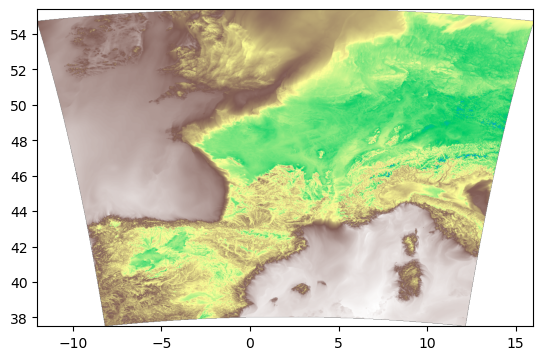

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 1121, 'height': 717, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.024977698483496878, 0.0, -12.0,
       0.0, -0.024965132496513248, 55.4)}
4326


'out_meta.update({\n    "driver": "GTiff",  \n    "height": out_img.shape[1], \n    "width": out_img.shape[2],\n    "transform": out_transform, \n    "crs": crs_proj.to_proj4()  # Utilisation de pyproj pour obtenir le proj4\n})\n\nprint(out_meta)'

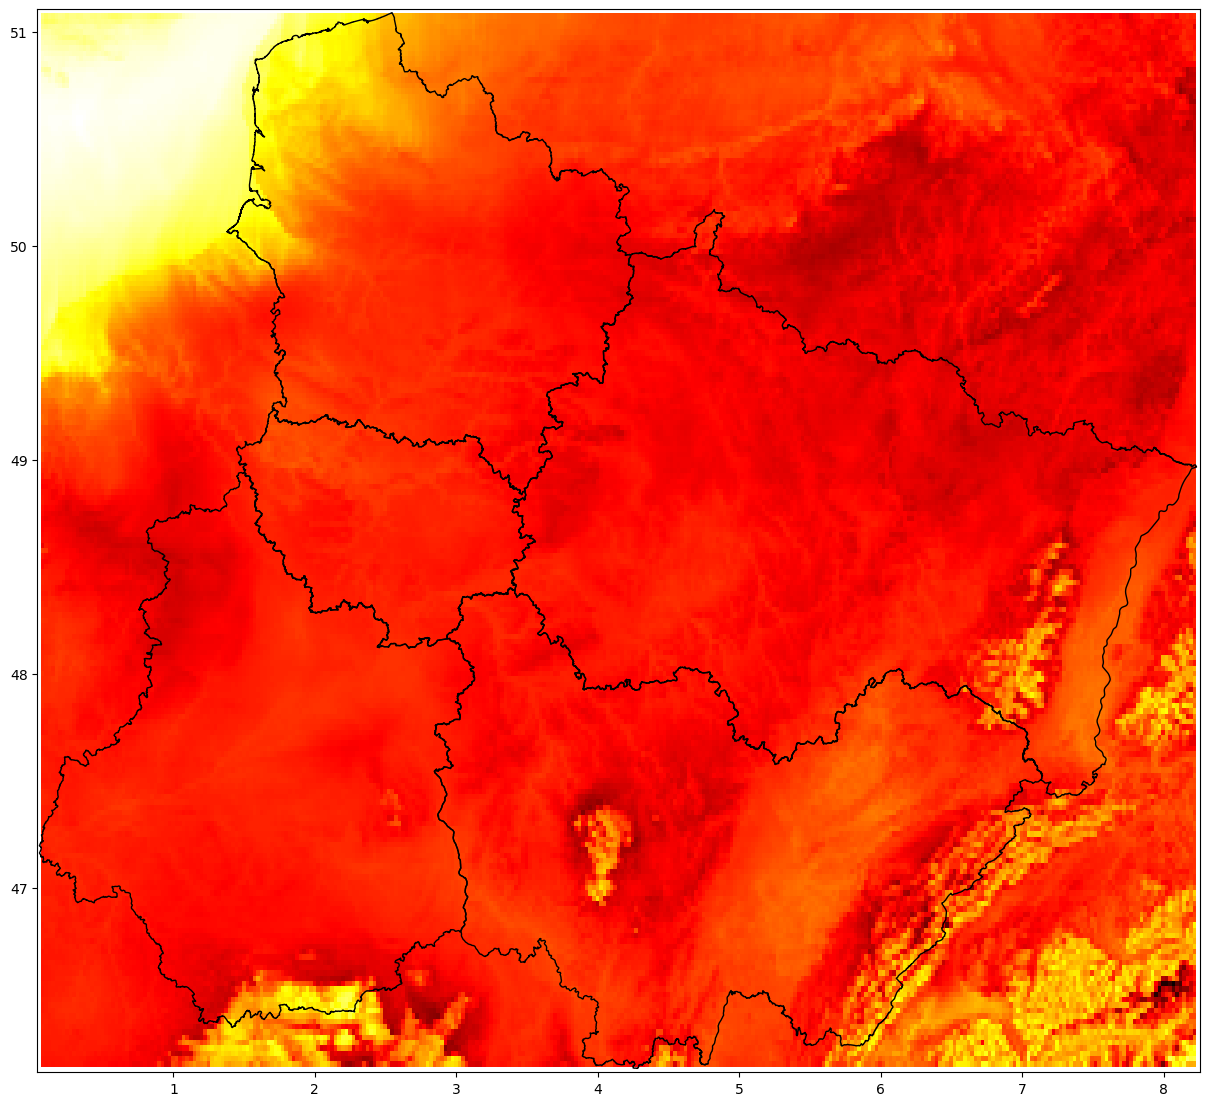

In [7]:
# Charger le fichier GeoPackage
gpkg_file = "chemin vers votre fichier de zone d'etude vecteur"
gdf = gpd.read_file(gpkg_file)
raster_file = "chemin vers votre fichier de raster enregistre"

#obtenir l'étendue  du GeoDataFrame
bounds = gdf.total_bounds
bbox = box(bounds[0], bounds[1], bounds[2], bounds[3])
# Afficher les coordonnées du bounding box (min_x, min_y, max_x, max_y)
print("Bounding box:", bounds)
#inserer le bbox dans un GeoDataFrame
geobbox = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
#function pour obtenier les coordonnées dans un format que rasterio utilise
def getFeatures(gdf):
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(geobbox)
print(coords)

data = rasterio.open(raster_file)
show(data, cmap='terrain')
# Appliquer le masque en utilisant les coordonnées géométriques (coords) et la découpe (crop=True)
out_img, out_transform = mask(data, shapes=coords, crop=True)
# Afficher l'image découpée
fig, ax = plt.subplots(figsize=(15, 15))

transform = data.transform
show(out_img, ax=ax, cmap='hot', transform=out_transform)
gdf.plot(ax=ax, facecolor='none', edgecolor='black')
# Copie des metadonnées
out_meta = data.meta.copy()
print(out_meta)

epsg_code = data.crs.to_epsg()
# Obtenez la projection du CRS en utilisant pyproj
crs_proj = pyproj.CRS.from_epsg(epsg_code)
print(epsg_code)
# Mettre à jour les métadonnées du raster
"""out_meta.update({
    "driver": "GTiff",  
    "height": out_img.shape[1], 
    "width": out_img.shape[2],
    "transform": out_transform, 
    "crs": crs_proj.to_proj4()  # Utilisation de pyproj pour obtenir le proj4
})

print(out_meta)"""


### Création d'une image animée montrant la variation des températures dans les régions d'études


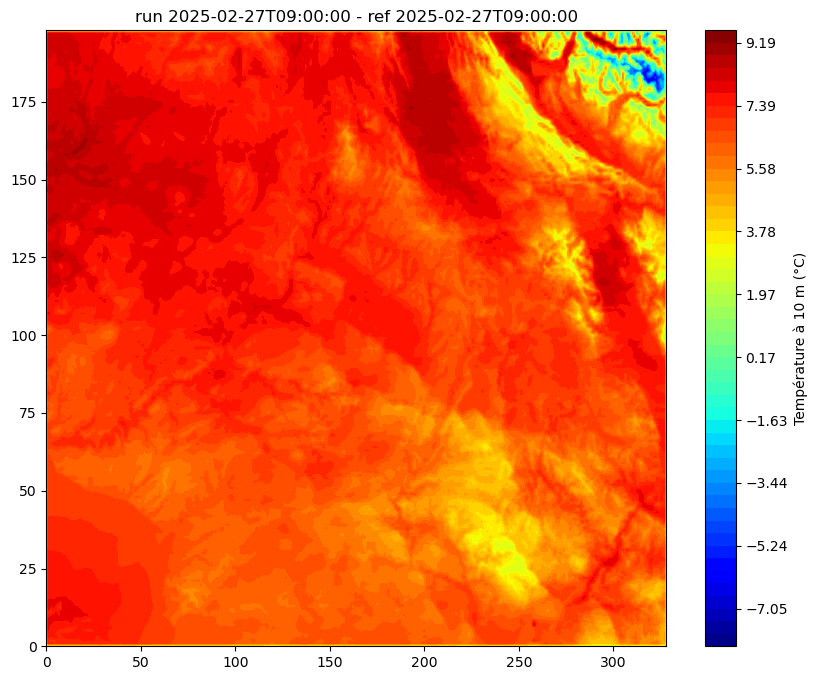

In [2]:
# Chemin vers les fichiers raster générés
raster_dir = "chemin vers votre fichier de raster"

# Obtenir la liste des fichiers .tif dans le répertoire
raster_files = sorted(glob.glob(os.path.join(raster_dir, "*.tif")))

# Taille de la figure
fig_size = (10, 8)
movie = True

# Création de la figure et de l'axe pour afficher les images
fig, ax = plt.subplots(figsize=fig_size)

# Initialisation du colormap et des niveaux de température
cmap = cm.jet
gpkg_file = "chemin vers votre fichier vecteur"
study_regions = gpd.read_file(gpkg_file)

#obtenir l'étendue  du GeoDataFrame
bounds = study_regions.total_bounds
bbox = box(bounds[0], bounds[1], bounds[2], bounds[3])
#Inserer le bbox dans geodataframe
geobbox = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(4326))
#Fonction permettant d'analyser les entités de GeoDataFrame au format  rasterio 
def getFeatures(gdf):
    
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(geobbox)

# Fonction pour mettre à jour l'animation
def update_frame(i):
    # Charger le fichier raster correspondant
    raster_path = raster_files[i]
    
    with rasterio.open(raster_path) as src:
        # Appliquer le masque en utilisant les coordonnées géométriques (coords) et la découpe
        img_mask, out_transform = mask(src, shapes=coords, crop=True)
        
        # Copier les métadonnées
        out_meta = src.meta.copy()
        #epsg_code = int(src.crs.data['init'][5:])
        epsg_code = src.crs.to_epsg()

        data = img_mask[0] - 273.15  # Convertir la première bande en température (en °C)
        data = np.nan_to_num(data, nan=0.0)  # Remplacer les NaN par des zéros
        
        temp_min = np.min(data)
        temp_max = np.max(data)
    
    # Ajuster la plage si les niveaux sont trop proches
    if temp_max - temp_min < 1:
        temp_max = temp_min + 1  # Définir une petite plage
    
    # Créer le contour pour la température
    num_levels = 50  
    levels = np.linspace(temp_min, temp_max, num_levels)
    CS = ax.contourf(data, levels=levels, cmap=cmap)
    #study_regions.plot(ax=ax, color=None, edgecolor='k',linewidth=2, alpha=0.25)
    
    # Extraire la date et l'heure depuis le nom du fichier raster
    file_parts = raster_path.split('_')
    date_part = file_parts[-2].replace('Day', '')
    time_part = file_parts[-1].replace('Time', '').replace('.tif', '')
    
    if len(time_part) == 4:  
        time_part = '0' + time_part

    #gere les cas de 24heure
    if time_part == '24h00':
        # Si l'heure est '24h00', la remplacer par '00h00' du jour suivant
        run_time_str = date_part + ' 00h00'
        creation_time = datetime.datetime.strptime(run_time_str, "%Y-%m-%d %Hh%M")
        # Ajouter un jour au `creation_time` pour passer au jour suivant
        creation_time += datetime.timedelta(days=1)
    else:
        # Sinon, utiliser l'heure telle quelle
        run_time_str = date_part + ' ' + time_part
        
    try:
        creation_time = datetime.datetime.strptime(run_time_str, "%Y-%m-%d %Hh%M")
    except ValueError as e:
        print(f"Erreur lors de la conversion de la chaîne en datetime : {e}")
        creation_time = None  # Affecter None si la conversion échoue
        
    # Vérifier si la conversion a réussi avant d'utiliser la variable creation_time
    if creation_time:
        ax.set_title(f"run {creation_time.isoformat()} - ref {creation_time.isoformat()}")
    else:
        ax.set_title("Erreur de format de date/heure")
    
        
    return CS  #
 

# Créer l'animation
ani = animation.FuncAnimation(fig, update_frame, frames=len(raster_files), interval=50, blit=False)

# Nous devons générer la première image pour l'utiliser avec la colorbar
with rasterio.open(raster_files[0]) as src:
    img_mask, out_transform = mask(src, shapes=coords, crop=True)
    # Convertir la température en °C
    data = img_mask[0] - 273.15  
    data = np.nan_to_num(data, nan=0.0)
    
    temp_min = np.min(data)
    temp_max = np.max(data)
    
    # Créer la couleur des niveaux de température
    num_levels = 50
    levels = np.linspace(temp_min, temp_max, num_levels)
    CS = ax.contourf(data, levels=levels, cmap=cmap)

# Créer la colorbar une seule fois en liant la colorbar au premier objet de contour (CS)
cbar = fig.colorbar(CS, ax=ax)
cbar.ax.set_ylabel('Température à 10 m (°C)')

# Sauvegarder l'animation sous forme de GIF
ani.save('temperature_animation.gif', writer='pillow', fps=1)

plt.show()


### Affichage de la variation de la température dans les regions d'études

In [3]:
from IPython.display import HTML

# Afficher le GIF dans le notebook avec HTML
HTML('<img src="temperature_animation.gif" width="1000">')  

### Extraction des valeurs des températures predites par le modèle

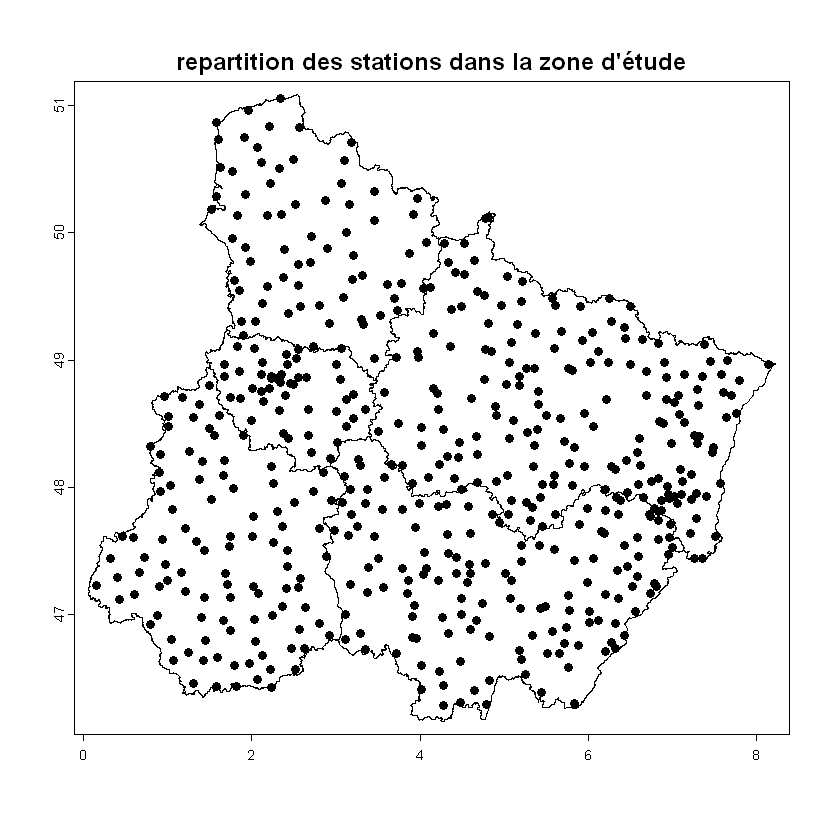

In [3]:
options(warn = -1)  # Désactive tous les warnings

library(terra)
library(dplyr)
# Chemin vers les fichiers raster générés
raster_dir = "chemin vers votre fichier de raster"
file_rast = list.files(path=raster_dir, pattern = "*.tif$", full.names = TRUE)
station_IDF = vect("chemin vers votre fichier de vecteur")
dept_IDF = vect("chemin vers votre fichier de vecteur zone d'etude")
plot(dept_IDF, main = "repartition des stations dans la zone d'étude")
plot(station_IDF, add=T)

# Initialisation d'un DataFrame vide
data_arome_df <- data.frame()
bound <- terra::ext(station_IDF)
minlon <- bound [1]
maxlon <- bound [2]
minlat <- bound [3]
maxlat <- bound [4]

for (i in 1: length(file_rast)) {
  raster = rast(file_rast[i])
  # Extraire la date et l'heure à partir du nom du fichier
  date <- substring(basename(file_rast[i]), 25, 34)  # Extraire la date
  heure <- substring(basename(file_rast[i]), 40, 43)  # Extraire l'heure
  # Recadrer le raster en fonction des limites du département
  raster <- terra::crop(raster, dept_IDF)
  raster <- terra::mask(raster, dept_IDF)
  
  # Créer un DataFrame temporaire avec la table attributaire du gpkg station_IDF
  temp_df <- as.data.frame(station_IDF)
  # Filtrer les colonnes spécifiques
  temp_df <- temp_df %>%
    select(id, name,long_name)
  # Extraire les valeurs des pixels des stations et fussioner avec df station
  temp_df  <- data.frame(temp_df , extract(raster, station_IDF))
  # Ajouter les colonnes 'date' et 'heure' au DataFrame
  temp_df$date <- rep(date, nrow(temp_df))
  temp_df$heure <- rep(heure, nrow(temp_df))
  
  # Ajouter les résultats au DataFrame principal
  data_arome_df <- bind_rows(data_arome_df, temp_df)
  
  
}

# Créer la colonne datetime avec le fuseau horaire Europe/Paris
data_arome_df$datetime <- as.POSIXct(paste(data_arome_df$date, data_arome_df$heure), 
                                     format = "%Y-%m-%d %Hh%M", tz = "Europe/Paris")


### Extraction des valeurs des températures observées par les stations

In [4]:
library(dplyr)
library(terra)

# Chemin vers les fichiers cvs des données stations
observ_dir = "chemin vers votre fichier de donnée observation"
file = list.files(path= observ_dir, pattern = "*.csv$", full.names = TRUE)

# Initialiser une liste vide pour stocker les DataFrames filtrés
list_of_dataframes <- list()

for (i in 1: length(file)) {
  f_csv <- read.csv(file[i], sep = ";")
  f_filtered <- f_csv %>%
    select(geo_id_insee,  lat, lon,validity_time, t, td, tx, tn)
  # Ajouter le DataFrame filtré à la liste
  list_of_dataframes[[i]] <- f_filtered
}
# Fusionner tous les DataFrames dans la liste en un seul DataFrame
merge_observ <- do.call(rbind, list_of_dataframes)

# Convertir la colonne numérique en caractère
merge_observ$validity_time <- as.character(merge_observ$validity_time)
# Créer la colonne datetime pour merge_observ avec le fuseau horaire UTC+1 (Europe/Paris)
merge_observ$datetime <- as.POSIXct(merge_observ$validity_time, 
                                    format = "%Y-%m-%dT%H:%M:%SZ", 
                                    tz = "Europe/Paris")


### Fussion des données observées et prédites par le modèle arome

In [5]:
# Effectuer la jointure entre merge_observ et data_arome_df
merged_df <- merge(data_arome_df, merge_observ , 
                   by.x = c("id", "datetime"), 
                   by.y = c("geo_id_insee", "datetime"), 
                   all.x = FALSE)  

#convertir les températures en kelvin
merged_df$Temp_arom <- merged_df$lyr.1 - 273.15
merged_df$Temp_stations <- merged_df$t - 273.15

In [6]:
print(head(merged_df))

        id            datetime            name                    long_name ID
1 10002001 2025-02-24 00:00:00 AILLEVILLE_SAPC AILLEVILLE (AILLEVILLE_SAPC) 26
2 10002001 2025-02-24 01:00:00 AILLEVILLE_SAPC AILLEVILLE (AILLEVILLE_SAPC) 26
3 10002001 2025-02-24 02:00:00 AILLEVILLE_SAPC AILLEVILLE (AILLEVILLE_SAPC) 26
4 10002001 2025-02-24 03:00:00 AILLEVILLE_SAPC AILLEVILLE (AILLEVILLE_SAPC) 26
5 10002001 2025-02-24 04:00:00 AILLEVILLE_SAPC AILLEVILLE (AILLEVILLE_SAPC) 26
6 10002001 2025-02-24 05:00:00 AILLEVILLE_SAPC AILLEVILLE (AILLEVILLE_SAPC) 26
     lyr.1       date heure      lat      lon        validity_time      t td
1 284.6690 2025-02-24  0h00 48.25417 4.685667 2025-02-24T00:00:00Z 281.55 NA
2 284.1732 2025-02-24  1h00 48.25417 4.685667 2025-02-24T01:00:00Z 281.95 NA
3 284.1355 2025-02-24  2h00 48.25417 4.685667 2025-02-24T02:00:00Z 281.65 NA
4 283.9609 2025-02-24  3h00 48.25417 4.685667 2025-02-24T03:00:00Z 281.85 NA
5 283.8195 2025-02-24  4h00 48.25417 4.685667 2025-02-24T04:00

### Comparaison des températures prédites par le modèles arome et celles observées par les stations en calculant des indicateurs statistiques

In [9]:
#chemin de sortie des fichier
Chemin_fichier_sortie <-"chemin vers pour les fichiers de sortie"

###################################ANALYSE STATISTIQUE##################################
###################################ANALYSE STATISTIQUE##################################


## extrait des idetifiants des stations
id_stations <- unique(merged_df$id)
station_info <- unique(merged_df[, c("id", "name")])

##calcul de la moyenne horraire des stations#####
Moy_serie_station<-data.frame()
Moy_serie_arome<-data.frame()

for (i in 1 : length(id_stations))
{
  fichiers <- merged_df
  ID_stations <- id_stations[i] 
  ##filter le df fichiers en fonction d'une station et conserver dans le df indices_stations
  indice_station<-subset(fichiers,fichiers[,1]==id_stations[i])
  # Filtrer les lignes avec des valeurs manquantes dans Temp_arom et Temp_stations
  indice_station <- indice_station[complete.cases(indice_station$Temp_arom, indice_station$Temp_stations), ]
  
  #moyenne horaire station
  Moy_sation<-round(mean(indice_station$Temp_stations),2) 
  Moy_serie_station<-rbind(Moy_serie_station, data.frame(ID_stations, Moy_sation ))
  
  #moyennes de arome
  Moy_arome<-round(mean(indice_station$Temp_arom),2) 
  Moy_serie_arome <-rbind(Moy_serie_arome, data.frame(ID_stations, Moy_arome))
  
}
# Fusionner Moy_serie_station et Moy_serie_arome par ID_stations
Moy_horaire <- merge(Moy_serie_station, Moy_serie_arome, by = "ID_stations")
# Renommer la colonne 'id' de station_info en 'ID_stations' 
colnames(station_info)[colnames(station_info) == "id"] <- "ID_stations"

# Fusionner Moy_serie avec les informations des stations pour ajouter les noms des stations
Moy_horaire <- merge(Moy_horaire, station_info, by = "ID_stations", all.x = FALSE)
## changer le nom  du df
nom_col <- c("ID_stations", "Moy_sation", "Moy_arome", "nom_stations")
colnames(Moy_horaire) <- nom_col
# reorganiser les colonnes du df
Moy_horaire <- Moy_horaire[, c("ID_stations", "nom_stations", "Moy_sation", "Moy_arome" )]

#####enregistrement des moyennes horaires des stations
setwd(Chemin_fichier_sortie)

write.table(Moy_horaire,"Moy_horaire.csv",row.names = FALSE, sep=";", dec=",") 


##calcul du biais par stations#########
biais_serie<-data.frame()

for(i in 1:length(id_stations))
{
  ID_stations <- id_stations[i]  
  fichiers <- merged_df
  ##filter le df fichiers en fonction d'une station et conserver dans le df indices_stations
  indice_station<-subset(fichiers,fichiers[,1]==ID_stations)
  BIAIS_perc<-100*(sum(indice_station$Temp_arom- indice_station$Temp_stations, na.rm = TRUE)/sum(indice_station$Temp_stations,na.rm = TRUE))
  BIAIS_perc<-round(BIAIS_perc,2)
  biais_serie<-rbind(biais_serie,data.frame(ID_stations ,BIAIS_perc))
}

## effectuer la jointure afin d'ajouter le nom des stations dans df des biais
biais_serie <- merge(biais_serie, station_info , 
                   by.x = "ID_stations", 
                   by.y = "ID_stations", 
                   all.x = FALSE)  
## changer le nom  du df
nom_col <- c("ID_stations", "BIAIS_perc", "nom_stations")
colnames(biais_serie) <- nom_col
#  reorganiser les colonnes du df
biais_serie <- biais_serie[, c("ID_stations", "nom_stations", "BIAIS_perc")]

setwd(Chemin_fichier_sortie)

write.table(biais_serie,"biais_serie.csv",row.names = FALSE, sep=";", dec=",")

##########RMSE PAR STATION##############################
Rmse_serie<-data.frame()

for(i in 1:length(id_stations))
{
  ID_stations <- id_stations[i]  
  fichiers <- merged_df
  ##filter le df fichiers en fonction d'une station et conserver dans le df indices_stations
  indice_station<-subset(fichiers,fichiers[,1]==ID_stations)
  # Sélectionner la moyenne de la température pour la station à partir de Moy_horaire
  selection_moy_station <- Moy_horaire[Moy_horaire$ID_stations == ID_stations, "Moy_sation"]
  RMSE<- sqrt(mean((indice_station$Temp_stations - indice_station$Temp_arom)^2, na.rm = TRUE))   
  RMSE_relatif <-round((RMSE/selection_moy_station),2)
  # Ajouter les résultats au dataframe avec le nom de la station et le RMSE relatif
  Rmse_serie <- rbind(Rmse_serie, data.frame(ID_stations = ID_stations, RMSE_relatif = RMSE_relatif))
}

# Fusionner RMSE_serie avec les informations des stations pour ajouter les noms des stations
Rmse_serie <- merge(Rmse_serie, station_info, by = "ID_stations", all.x = FALSE)
## changer le nom  du df
nom_col <- c("ID_stations", "RMSE_relatif", "nom_stations")
colnames(Rmse_serie) <- nom_col
#  reorganiser les colonnes du df
Rmse_serie <- Rmse_serie[, c("ID_stations", "nom_stations", "RMSE_relatif")]

setwd(Chemin_fichier_sortie)

write.table(Rmse_serie,"Rmse_serie.csv",row.names = FALSE, sep=";", dec=",") 


### fussion des biais au gpk station et conversion geodaframe pour la cartographie

In [2]:
import csv
import json
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
##chenmin vers les fichiers csv
chemin_csv = "chemin vers votre fichier data observer/"
study_zone = "chemin vers votre fichier vecteur zone d'etude"
station_gpkg = "chemin vers votre fichier vecteur point station"

study_regions = gpd.read_file(study_zone)
station_gpkg = gpd.read_file(station_gpkg)
def read_biais(path):
    """
    - Fonction qui lie le fichier biais et stoske dans dictionnaire
    """
    biais_stations = {}
    with open(path, encoding='utf-8', mode="r") as f:
        reader = csv.DictReader(f, delimiter=";")
        for station in reader :
            try:
                # Correction du format de la donnée 'BIAIS_perc' (remplacer la virgule par un point)
                biais_perc = station['BIAIS_perc'].replace(",", ".")
                biais_stations[int(float(station['ID_stations']))] = {
                    "ID_stations": int(float(station['ID_stations'])),
                    "nom_stations" : station['nom_stations'],
                    "BIAIS_perc" : float(biais_perc)
                }
            except:
                print(f"Données imcomplètes pour {station}")
    return biais_stations

def merge_data(geodata, biais_station):
    """
    - fuction qui join le géodataframe au fichier biais
    """
    data_merge = geodata[['id', 'name' ,'lat', 'lon', 'alt', 'geometry']].dropna().to_json()
    # Convert JSON string to Python dictionary
    data_merge = json.loads(data_merge)  
    for feature in data_merge['features']:        
        station_id = feature['properties']['id']
        if station_id in biais_station:
            feature['properties']["BIAIS_perc"] = biais_station[station_id]["BIAIS_perc"]
        else:
            #print(f"station {station_id} non trouvé dans les données de biais.")
            pass
    return data_merge
def convert_dict_gdf(biais_station_merge):
    """
    Convertir un dictionnaire (FeatureCollection) en GeoDataFrame.
    """
    # Extraire les données des features
    features = biais_station_merge['features']    
    # Extraire les informations des propriétés et géométrie
    properties = []
    geometries = []    
    for feature in features:
        # Extraire les propriétés (nom, id, lat, lon, etc.)
        properties.append(feature['properties'])        
        # Extraire la géométrie (lat, lon) et la convertir en Point
        coordinates = feature['geometry']['coordinates']
        point = Point(coordinates[0], coordinates[1])  # (lon, lat)
        geometries.append(point)    
    # Créer un DataFrame avec les propriétés
    df = pd.DataFrame(properties)    
    # Ajouter la colonne geometry
    df['geometry'] = geometries    
    # Convertir le DataFrame en GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
    
    return gdf

# Lecture du fichier CSV  
biais_station = read_biais(chemin_csv+"biais_serie.csv")
biais_station_merge = merge_data(station_gpkg, biais_station)
biais_station_geo = convert_dict_gdf(biais_station_merge)

Données imcomplètes pour {'ID_stations': '60500005', 'nom_stations': 'PLESSIS-BELLEVILLE AERO', 'BIAIS_perc': 'NA'}


### Visualiser la carte des Biais avec le MNT

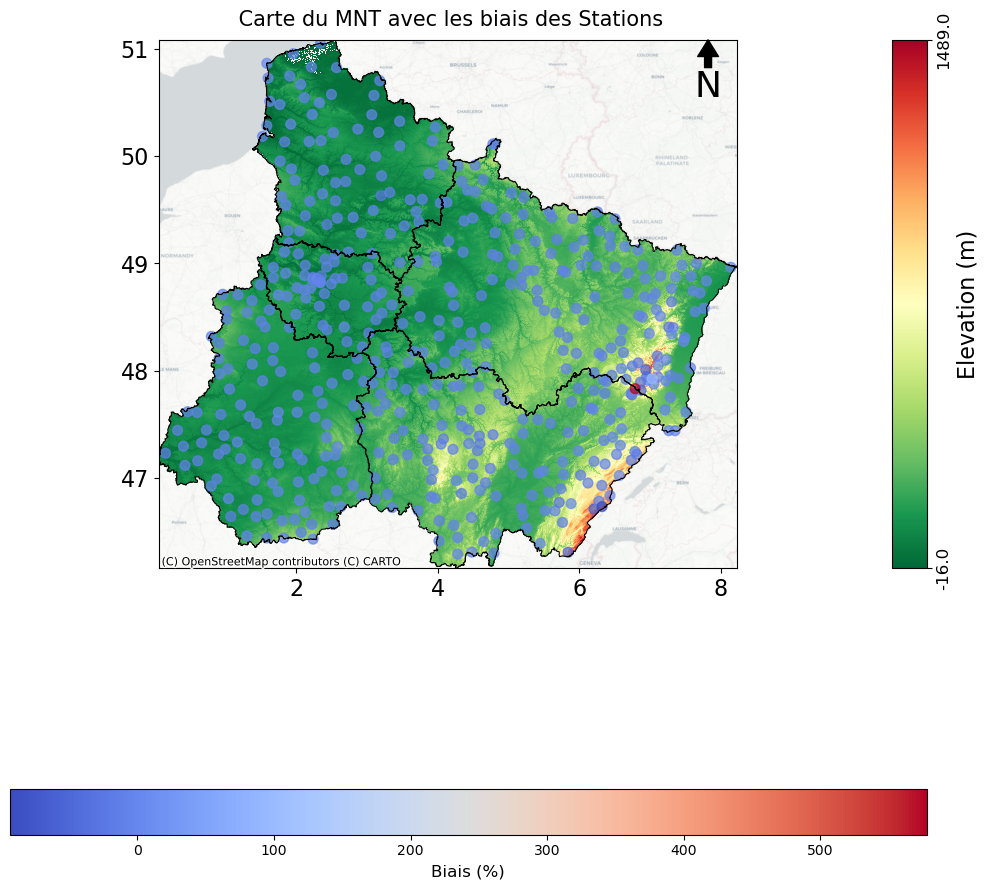

In [8]:
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rasterio.plot
from matplotlib_scalebar.scalebar import ScaleBar
from rasterio.mask import mask
from rasterio.warp import reproject, Resampling


chemin_vect = "chemin vers votre fichier raster/"
mnt_path = chemin_vect+"MNT_study_region.tif"

#Import du fichier
with rasterio.open(mnt_path) as src:
    raster = src.read(1)
    nodata_value = src.nodata  # Récupérer la valeur sans données
    raster_crs = src.crs  # Système de coordonnées du raster
    raster_transform = src.transform  # Transformation géographique du raster

#taille fig de sortie
fig,ax = plt.subplots(figsize=(10,10))

#ajout du shapefile
data_shp = study_regions

# Créer le masque sur le raster avec le shapefile
with rasterio.open(mnt_path) as src:
    # Appliquer le masque géospatial
    out_image, out_transform = mask(src, data_shp.geometry, crop=True)
    out_image = out_image[0]  # Extraire la première bande (si multibande)

# Appliquer un masque pour rendre les zones en dehors du polygone en blanc (ou NaN)
out_image = np.ma.masked_where(out_image == nodata_value, out_image)

# Extraire vmin et vmax directement à partir des données raster
vmin, vmax = np.nanmin(out_image), np.nanmax(out_image)
cmap2 = plt.cm.RdYlGn_r  # Use RdYlGn colormap GnYlRd
norm = plt.Normalize(vmin=vmin, vmax=vmax)

ax.imshow(out_image, cmap = cmap2, norm = norm, extent = rasterio.plot.plotting_extent(src), interpolation = 'none')
ctx.add_basemap(ax, crs = src.crs, source = ctx.providers.CartoDB.Positron, zoom = 8, alpha = 1)
im = ax.imshow(out_image, cmap = cmap2, norm = norm, extent = rasterio.plot.plotting_extent(src), interpolation = 'none')

data_shp.boundary.plot(ax=ax, linewidth = 0.75, edgecolor = 'black')

# Tracer le biais des stations
norm_biais = mpl.colors.Normalize(vmin=biais_station_geo['BIAIS_perc'].min(), vmax=biais_station_geo['BIAIS_perc'].max())
cmap_biais = 'coolwarm'  

biais_station_geo.plot(column='BIAIS_perc', ax=ax, legend=False, cmap=cmap_biais, markersize=50, alpha=0.7, norm=norm_biais)

# Ajouter la légende manuellement
sm = plt.cm.ScalarMappable(cmap=cmap_biais, norm=norm_biais)
sm.set_array([])  
cbar_biais = fig.colorbar(sm, ax=ax, orientation='horizontal')
cbar_biais.set_label('Biais (%)', fontsize=12)

#ajout de la fleche du nord
x, y, arrow_length = 0.95, 1, 0.09
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=26,
            xycoords=ax.transAxes)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
plt.title(" Carte du MNT avec les biais des Stations", fontsize = 15, pad = 10)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "4%", pad = 0.06)
cbar = plt.colorbar(im, cax = cax, aspect = 10)
# ajout du label de la legende
cbar.set_ticks([vmin, vmax])  # Min and max seulement
cbar.set_ticklabels([f'{vmin}', f'{vmax}'], rotation=90, verticalalignment='center', fontsize=12)
cbar.set_label(label='Elevation (m)', size=16)
plt.tight_layout()
plt.show()



### Carte interactive des Biais

In [21]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import json
from shapely.geometry import Polygon, Point, shape, mapping
from shapely.ops import transform

from branca.element import Figure
import folium
import folium.plugins as plugins
from IPython.display import IFrame

map_title = 'Répartition des Biais des différentes stations'
title_html = f'<h3 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h3>'
# zoom de la zone d'etude
fig2=Figure(width=1000,height=800)
map1 = folium.Map([48.5, 5.3], tiles='cartodbpositron',  control_scale=True, zoom_start=6.5,)
fig2.add_child(map1)


# ajout de l'option plein ecran et de dessin
plugins.Fullscreen(position='bottomright').add_to(map1)
draw = plugins.Draw(export=True)# add draw tools to map
draw.add_to(map1)


# ajout des tuilles
tiles = ['cartodbpositron', 'openstreetmap','stamenwatercolor']

for tile in tiles:
    folium.TileLayer(tile).add_to(map1)

##afficher le geojson des regions
folium.GeoJson(study_regions, name= 'Limites Regions').add_to(map1)

# Supprimer les lignes avec des valeurs manquantes dans 'BIAIS_perc'
biais_station_geo = biais_station_geo.dropna(subset=['BIAIS_perc'])
# Séparer les biais négatifs et positifs
biais_negatifs = biais_station_geo[biais_station_geo['BIAIS_perc'] < 0].copy()
biais_positifs = biais_station_geo[biais_station_geo['BIAIS_perc'] >= 0].copy()

# Calculer les quantiles séparément pour les biais négatifs (2 classes) et les biais positifs (2 classes)
quantiles_negatifs = 2
biais_negatifs['Biais_class'] = pd.qcut(biais_negatifs['BIAIS_perc'], q=quantiles_negatifs, labels=['Biais Négatif Faible', 'Biais Négatif Fort'])

quantiles_positifs = 2
biais_positifs['Biais_class'] = pd.qcut(biais_positifs['BIAIS_perc'], q=quantiles_positifs, labels=['Biais Positif Faible', 'Biais Positif Fort'])

# Fusionner les données négatives et positives après l'ajout des classes
biais_station_geo = pd.concat([biais_negatifs, biais_positifs])

# Définir un colormap avec des couleurs distinctes pour les quantiles négatifs et positifs
colormap = {
    'Biais Négatif Faible': '#1560BD',   
    'Biais Négatif Fort': '#53739A',     

    'Biais Positif Faible': '#E2725B',  
    'Biais Positif Fort': '#AE4A34',   
}

# Ajouter les points à la carte avec les nouvelles classes et couleurs
for _, row in biais_station_geo.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=8,
        color=colormap[row['Biais_class']],  
        fill=True,
        fill_color=colormap[row['Biais_class']],
        fill_opacity=0.7,
        popup=f'Biais: {row["BIAIS_perc"]}% - {row["Biais_class"]}'
    ).add_to(map1)

# Calculer les intervalles des quantiles pour les légendes (négatifs et positifs)
quantiles_values_negatifs = pd.qcut(biais_negatifs['BIAIS_perc'], q=quantiles_negatifs)
quantiles_values_positifs = pd.qcut(biais_positifs['BIAIS_perc'], q=quantiles_positifs)

# Extraire les intervalles des quantiles négatifs et positifs
quantile_intervals_negatifs = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in quantiles_values_negatifs.cat.categories]
quantile_intervals_positifs = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in quantiles_values_positifs.cat.categories]

# Générer la légende HTML dynamique 
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; right: 190px; width: 180px; height: auto; 
                background-color: white; z-index:9999; border:2px solid grey; 
                font-size: 14px; padding: 10px;">
        <b>Biais en %</b><br>
'''

# Ajouter les intervalles et les couleurs à la légende pour les biais négatifs
for i, quantile_class in enumerate(quantile_intervals_negatifs):
    color = colormap.get(f'Biais Négatif {"Fort" if i == 1 else "Faible"}', 'gray')
    legend_html += f'<i style="background: {color}; width: 18px; height: 18px; display: inline-block;"></i> {quantile_class}<br>'

# Ajouter les intervalles et les couleurs à la légende pour les biais positifs
for i, quantile_class in enumerate(quantile_intervals_positifs):
    color = colormap.get(f'Biais Positif {"Fort" if i == 1 else "Faible"}', 'gray')
    legend_html += f'<i style="background: {color}; width: 18px; height: 18px; display: inline-block;"></i> {quantile_class}<br>'

# Ajouter la fin de la légende
legend_html += '</div>'

# Ajouter le contrôle de la carte et la légende dynamique
folium.LayerControl().add_to(map1)
map1.get_root().html.add_child(folium.Element(title_html))
map1.get_root().html.add_child(folium.Element(legend_html))

# Sauvegarder la carte
map1.save('carte_des_biais.html')
IFrame('carte_des_biais.html', width=1000, height=800)

Sur la carte des biais nous pouvons observer une sous estimation importante de la prediction Arome par rapport au données d'observation des stations avec des biais négatives comprises entre -93 et -,02. Mais nous pouvons remarqué au niveau de quelque stations des sur estimations avec des biais compris entre 4,47 et 577,92. La station qui à la valeur 577,92 est la qui a l'identifiant 70283006 qui se trouvent dans le departement Haute-Saône. Ce biais est anormal dont nous ne saurons expliqué la raison de cette anomalie. 

### Fussion des RMSE au geopakage des stations et conversion en geodaframe pour la cartographie

In [7]:
import csv
import json
from shapely.geometry import Point
import pandas as pd
##chenmin vers les fichiers csv
chemin_csv = "chemin vers votre fichier data observer/"
study_zone = "chemin vers votre fichier /region_etude.gpkg"
station_gpkg = "chemin vers votre fichier /station_etude.gpkg"

study_regions = gpd.read_file(study_zone)
station_gpkg = gpd.read_file(station_gpkg)
def read_RMSE(path):
    """
    - Fonction qui lie le fichier RMSE des stations et le stocke dans un dictionnaire
    """
    rmse_stations = {}
    with open(path, encoding='utf-8', mode="r") as f:
        reader = csv.DictReader(f, delimiter=";")
        for station in reader :
            try:
                # Correction du format de la donnée 'RMSE_relatif' (remplacer la virgule par un point)
                rmse = station['RMSE_relatif'].replace(",", ".")
                rmse_stations[int(float(station['ID_stations']))] = {
                    "ID_stations": int(float(station['ID_stations'])),
                    "nom_stations" : station['nom_stations'],
                    "RMSE_relatif" : float(rmse)
                }
            except:
                print(f"Données imcomplètes pour {station}")
    return rmse_stations

def merge_data_RMSE(geodata, rmse_station):
    """
    - fonction qui join le geodataframe au RMSE
    """
    data_merge = geodata[['id', 'name' ,'lat', 'lon', 'alt', 'geometry']].dropna().to_json()
    # Convert JSON string to Python dictionary
    data_merge = json.loads(data_merge)  
    for feature in data_merge['features']:        
        station_id = feature['properties']['id']
        if station_id in rmse_station:
            feature['properties']["RMSE_relatif"] = rmse_station[station_id]["RMSE_relatif"]
        else:
            #print(f"station {station_id} non trouvé dans les données de biais.")
            pass
    return data_merge
def convert_dict_gdf(dict_merge_stat_rmse):
    """
    Convertir un dictionnaire (FeatureCollection) en GeoDataFrame.
    """
    # Extraire les données des features
    features = dict_merge_stat_rmse['features']    
    # Extraire les informations des propriétés et géométrie
    properties = []
    geometries = []    
    for feature in features:
        # Extraire les propriétés (nom, id, lat, lon, etc.)
        properties.append(feature['properties'])        
        # Extraire la géométrie (lat, lon) et la convertir en Point
        coordinates = feature['geometry']['coordinates']
        point = Point(coordinates[0], coordinates[1])  # (lon, lat)
        geometries.append(point)    
    # Créer un DataFrame avec les propriétés
    df = pd.DataFrame(properties)    
    # Ajouter la colonne geometry
    df['geometry'] = geometries    
    # Convertir le DataFrame en GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
    
    return gdf

# Lecture du fichier CSV  
Rmse_serie = read_RMSE(chemin_csv+"Rmse_serie.csv")
RMSE_station_merge = merge_data_RMSE(station_gpkg, Rmse_serie)
rmse_station_geo = convert_dict_gdf(RMSE_station_merge)

Données imcomplètes pour {'ID_stations': '60500005', 'nom_stations': 'PLESSIS-BELLEVILLE AERO', 'RMSE_relatif': 'NA'}


### Carte interactive des RMSE

In [20]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import json
from shapely.geometry import Polygon, Point, shape, mapping
from shapely.ops import transform

from branca.element import Figure
import folium
import folium.plugins as plugins
from IPython.display import IFrame

map_title = 'Répartition des RMSE des différentes stations'
title_html = f'<h3 style="position:absolute;z-index:100000;left:40vw" >{map_title}</h3>'
# zoom sur a zon d'etude
fig2=Figure(width=1000,height=800)
map1 = folium.Map([48.5, 5.3], tiles='cartodbpositron',  control_scale=True, zoom_start=6.5,)
fig2.add_child(map1)


# Create full screen
plugins.Fullscreen(position='bottomright').add_to(map1)
draw = plugins.Draw(export=True)# add draw tools to map
draw.add_to(map1)


# Create tiles (background)
tiles = ['cartodbpositron', 'openstreetmap','stamenwatercolor']

for tile in tiles:
    folium.TileLayer(tile).add_to(map1)

##afficher le geojson des regions
folium.GeoJson(study_regions, name= 'Limites Regions').add_to(map1)

# Supprimer les lignes avec des valeurs manquantes dans 'BIAIS_perc'
rmse_station_geo = rmse_station_geo.dropna(subset=['RMSE_relatif'])
quantiles = 4
rmse_station_geo['RMSE_class'] = pd.qcut(rmse_station_geo['RMSE_relatif'], q=quantiles, labels=[f'Quantile {i+1}' for i in range(quantiles)])

# Définir un colormap pour afficher les couleurs selon les quantiles
colormap = {
    'Quantile 1': '#002FA7',    
    'Quantile 2': 'green',   
    'Quantile 3': '#E2725B',  
    'Quantile 4': '#AE4A34',      
}

# Ajouter les points à la carte Folium avec une couleur en fonction du biais
for _, row in rmse_station_geo.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=8,
        color=colormap[row['RMSE_class']],  
        fill=True,
        fill_color=colormap[row['RMSE_class']],
        fill_opacity=0.7,
        popup=f'Biais: {row["RMSE_relatif"]}% - {row["RMSE_class"]}'
        #
    ).add_to(map1)

# Calculer les intervalles des quantiles pour afficher dans la légende
quantiles_values = pd.qcut(rmse_station_geo['RMSE_relatif'], q=quantiles)

# Extraire les intervalles des quantiles
quantile_intervals = [f'{interval.left:.2f} - {interval.right:.2f}' for interval in quantiles_values.cat.categories]

# Générer la légende HTML dynamique avec les intervalles des quantiles
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; right: 190px; width: 180px; height: auto; 
                background-color: white; z-index:9999; border:2px solid grey; 
                font-size: 14px; padding: 10px;">
        <b>RMSE rélatif</b><br>
'''

# Ajouter les intervalles et les couleurs à la légende
for i, quantile_class in enumerate(quantile_intervals):
    color = colormap.get(f'Quantile {i+1}', 'gray')  # Utiliser 'gray' si la couleur n'est pas définie
    legend_html += f'<i style="background: {color}; width: 18px; height: 18px; display: inline-block;"></i> {quantile_class}<br>'

# Ajouter  la légende
legend_html += '</div>'

# ajout du contole de la carte
folium.LayerControl().add_to(map1)
map1.get_root().html.add_child(folium.Element(title_html))
map1.get_root().html.add_child(folium.Element(legend_html))

map1.save('carte_des_rmse.html')
IFrame('carte_des_rmse.html', width=1000, height=800)

La carte des RMSE ci-dessus confirme les resultats des biais obtenus en amont. En effet nous observons un RMSE élévé pour un nombre important de station. par contre nous pouvons remarqué que les stations situées vers le centre de la région d'étude ont des RMSE moins élévés par rapport aux autres stations, ceci peut être exlpliquer par une variation d'altitude pour ces stations par rapport aux autres. 

### Fussion de la différence des moyennes horarires d'Arome et des observations au fichier geopackage des stations.

In [10]:
import csv
import json
from shapely.geometry import Point
import pandas as pd
##chenmin vers les fichiers csv
chemin_csv = "chemin vers votre fichier /result_data/"
study_zone = "chemin vers votre fichier/region_etude.gpkg"
station_gpkg = "chemin vers votre fichier station_etude.gpkg"

study_regions = gpd.read_file(study_zone)
station_gpkg = gpd.read_file(station_gpkg)
def read_moy_diff(path):
    """
    - Fonction qui lie le fichier des diff moyenne et le stocke dans un dict.
    """
    diff_stations = {}
    with open(path, encoding='utf-8', mode="r") as f:
        reader = csv.DictReader(f, delimiter=";")
        for station in reader :
            try:
                # Correction du format de la donnée 'diff' (remplacer la virgule par un point)
                diff = station['diff'].replace(",", ".")
                diff_stations[int(float(station['ID_stations']))] = {
                    "ID_stations": int(float(station['ID_stations'])),
                    "nom_stations" : station['nom_stations'],
                    "Moy_sation" : station["Moy_sation"],
                    "Moy_arome" : station["Moy_arome"],
                    "diff_moy" : float(diff)
                }
            except:
                print(f"Données imcomplètes pour {station}")
    return diff_stations

def merge_data_diff(geodata, moy_diff):
    """
    - fonction qui join le fichier geodataframe au fichier des diffs moyennes
    """
    data_merge = geodata[['id', 'name' ,'lat', 'lon', 'alt', 'geometry']].dropna().to_json()
    # Convert JSON string to Python dictionary
    data_merge = json.loads(data_merge)  
    for feature in data_merge['features']:        
        station_id = feature['properties']['id']
        if station_id in moy_diff:
            feature['properties']["diff_moy"] = moy_diff[station_id]["diff_moy"]
        else:
            #print(f"station {station_id} non trouvé dans les données de biais.")
            pass
    return data_merge
def convert_dict_gdf(dict_merge_stat_diff):
    """
    Convertir un dictionnaire (FeatureCollection) en GeoDataFrame.
    """
    # Extraire les données des features
    features = dict_merge_stat_diff['features']    
    # Extraire les informations des propriétés et géométrie
    properties = []
    geometries = []    
    for feature in features:
        # Extraire les propriétés (nom, id, lat, lon, etc.)
        properties.append(feature['properties'])        
        # Extraire la géométrie (lat, lon) et la convertir en Point
        coordinates = feature['geometry']['coordinates']
        point = Point(coordinates[0], coordinates[1])  # (lon, lat)
        geometries.append(point)    
    # Créer un DataFrame avec les propriétés
    df = pd.DataFrame(properties)    
    # Ajouter la colonne geometry
    df['geometry'] = geometries    
    # Convertir le DataFrame en GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
    
    return gdf

# Lecture du fichier CSV  
diff_Moy_station = read_moy_diff(chemin_csv+"Moy_horaire.csv")
diff_Moy_station_merge = merge_data_diff(station_gpkg, diff_Moy_station)
diff_station_geo = convert_dict_gdf(diff_Moy_station_merge)

Données imcomplètes pour {'ID_stations': '60500005', 'nom_stations': 'PLESSIS-BELLEVILLE AERO', 'Moy_sation': 'NA', 'Moy_arome': 'NA', 'diff': 'NA'}


### Carte interactives de la différence des moyennes horaires entre les observations et la prédiction Arome

In [19]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import json
from shapely.geometry import Polygon, Point, shape, mapping
from shapely.ops import transform

from branca.element import Figure
import folium
import folium.plugins as plugins
from IPython.display import IFrame

map_title = 'Répartition de la différence des moyennes horaires des différentes stations'
title_html = f'<h3 style="position:absolute;z-index:100000;left:35vw;" >{map_title}</h3>'
# Define map area
fig2=Figure(width=1000,height=800)
map1 = folium.Map([48.5, 5.3], tiles='cartodbpositron',  control_scale=True, zoom_start=6.5,)
fig2.add_child(map1)


# Create full screen
plugins.Fullscreen(position='bottomright').add_to(map1)
draw = plugins.Draw(export=True)# add draw tools to map
draw.add_to(map1)


# Create tiles (background)
tiles = ['cartodbpositron', 'openstreetmap','stamenwatercolor']

for tile in tiles:
    folium.TileLayer(tile).add_to(map1)

##afficher le geojson des regions
folium.GeoJson(study_regions, name= 'Limites Regions').add_to(map1)


# Supprimer les lignes avec des valeurs manquantes dans 'diff_moy'
diff_station_geo = diff_station_geo.dropna(subset=['diff_moy']).copy()
# Créer la colonne 'categorie' et remplir selon la valeur de 'diff_moy'
diff_station_geo['categorie'] = np.where(diff_station_geo['diff_moy'] < 0, 'Sous-estimation',
                                          np.where(diff_station_geo['diff_moy'] > 0, 'Surestimation', 'Estimation correcte'))

# Définir un colormap pour afficher les couleurs selon les quantiles
colormap = {
    'Surestimation': '#AE4A34',    
    'Estimation correcte': 'green',  
    'Sous-estimation': '#002FA7',  
}

# Ajouter les points à la carte Folium avec une couleur en fonction du biais
for _, row in diff_station_geo.iterrows():
    folium.CircleMarker(
        location=[row['geometry'].y, row['geometry'].x],
        radius=8,
        color=colormap[row['categorie']],  # Utiliser la couleur définie pour chaque quantile
        fill=True,
        fill_color=colormap[row['categorie']],
        fill_opacity=0.7,
        popup=f'Biais: {row["diff_moy"]}% - {row["categorie"]}'
        #
    ).add_to(map1)

# Extraire les classes des quantiles uniques dans 'Biais_class'
quantile_classes = diff_station_geo['categorie'].dropna().unique()
# Générer la légende HTML dynamique
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; right: 190px; width: 180px; height: auto; 
                background-color: white; z-index:9999; border:2px solid grey; 
                font-size: 14px; padding: 10px;">
        <b>Types d'estimation</b><br>
'''

# Ajouter les couleurs et les quantiles à la légende
for quantile_class in quantile_classes:
    color = colormap.get(quantile_class, 'gray')  # Utiliser 'gray' si la couleur n'est pas définie
    legend_html += f'<i style="background: {color}; width: 18px; height: 18px; display: inline-block;"></i> {quantile_class}<br>'

# Ajouter la fin de la légende
legend_html += '</div>'

# contole de la carte
folium.LayerControl().add_to(map1)
map1.get_root().html.add_child(folium.Element(title_html))
map1.get_root().html.add_child(folium.Element(legend_html))

map1.save('carte_diff_moy_horaire.html')
IFrame('carte_diff_moy_horaire.html', width=1000, height=800)

Sur la carte de la différence des moyennes horaires des températures entre les observations et la simulation AROME, nous pouvons observer que le modèle AROME sous-estime de manière importante la température, comme le confirment les deux autres indicateurs statistiques (RMSE, biais). Le modèle simule la température à différentes altitudes. Dans le cadre de ce projet, nous avons effectué une comparaison entre les températures observées et celles simulées par le modèle AROME à 10 m d'altitude. Étant donné qu'il y a une diminution de 0,6°C tous les 100 m d'altitude, alors que les stations d'observation sont généralement situées à environ 2 m d'altitude, cette importante sous-estimation peut s'expliquer en partie par cette différence d'altitude. Afin de confirmer cela, d'autres analyses comparatives pourraient être effectuées entre les données observées et les températures de surface simulées par AROME, mais elles ne sont pas réalisées dans cette étude. Un autre facteur qui pourrait expliquer cette sous-estimation est la résolution des données AROME, qui est de 0,025 degré, ce qui correspond à environ 2,5 km².

### Boxplot des Biais et des RMSE des stations. 

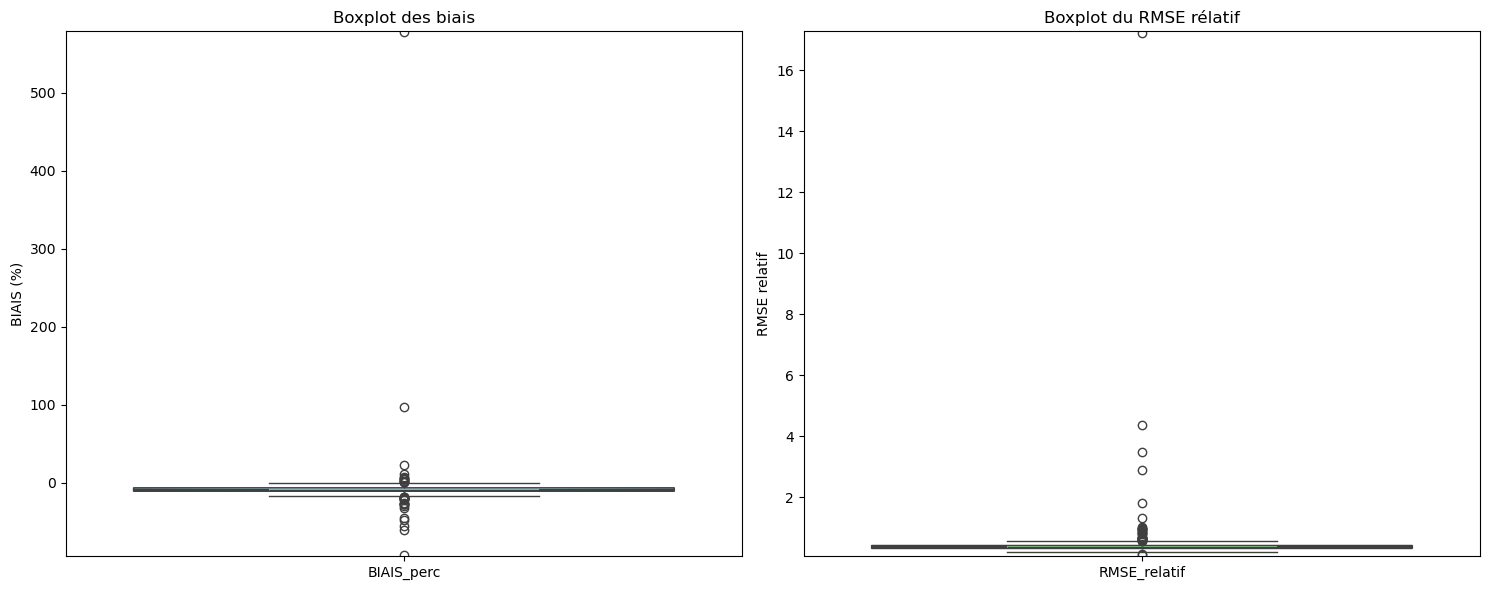

In [7]:
#diff_Moy_station, biais_station, Rmse_serie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir les dictionnaires en DataFrame pandas
biais_df = pd.DataFrame.from_dict(biais_station, orient='index')
rmse_df = pd.DataFrame.from_dict(Rmse_serie, orient='index')

# Fusionner les deux DataFrames en utilisant la clé 'ID_stations'
merged_df = pd.merge(biais_df[['ID_stations', 'nom_stations', 'BIAIS_perc']], 
                     rmse_df[['ID_stations', 'RMSE_relatif']], 
                     on='ID_stations')

# Visualisation avec deux boxplots distincts avec axes séparés
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  # 1 ligne et 2 colonnes d'axes

# Boxplot pour BIAIS_perc
sns.boxplot(data=merged_df[['BIAIS_perc']], ax=ax[0], color='skyblue', fliersize=6, notch=True)
ax[0].set_title('Boxplot des biais')
ax[0].set_ylabel('BIAIS (%)')
ax[0].set_ylim(merged_df['BIAIS_perc'].min() - 1, merged_df['BIAIS_perc'].max() + 1)  # Ajuster les limites de y

# Boxplot pour RMSE_relatif
sns.boxplot(data=merged_df[['RMSE_relatif']], ax=ax[1], color='lightgreen', fliersize=6, notch=True)
ax[1].set_title('Boxplot du RMSE rélatif')
ax[1].set_ylabel('RMSE relatif')
ax[1].set_ylim(merged_df['RMSE_relatif'].min() - 0.05, merged_df['RMSE_relatif'].max() + 0.05)  # Ajuster les limites de y

# Affichage du graphique
plt.tight_layout()
plt.show()

les boxplots des biais et des RMSE ci dessus montrent une forte concentration des valeurs des bais des stations au autour -9 et 4 % pour les RMSE une forte concentration des valeurs entre 0,2 et 14.

### Références bibliographiques

- Ducrocq, V., et al. (2014). "HyMeX: A 10-year multidisciplinary program on the Mediterranean water cycle." *Bulletin of the American Meteorological Society*, 95(7), 1063-1082.
- Bresson, E., et al. (2012). "High-resolution numerical simulations of the convective system observed during the HyMeX IOP7a: Sensitivity to microphysics and model resolution." *Quarterly Journal of the Royal Meteorological Society*, 138(667), 1851-1872.
- Masson, V., et al. (2013). "The CANOPEE project: A 1D model for urban climate and building energy modeling." *Urban Climate*, 4, 1-18.
### Webographies
- https://chatgpt.com/; consulté tout au long du projet.

- https://www.deepseek.com/; consulté tout au long du prjet

- https://portail-api.meteofrance.fr/web/fr/, dernière consultation, 06/03/2025.

- https://meteo.data.gouv.fr/, dernière consultation, 06/03/2025.

- https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map; consulté le 07/03/2025.

- https://www.architecture-performance.fr/ap_blog/fetching-arome-weather-forecasts-and-plotting-temperatures/, dernière consultation le 07/03/2025.

- https://github.com/nawendt/gribr consulté le 25/02/2025.

- https://confluence.ecmwf.int/display/ECC/ecCodes+Home consulté le 25/02/2025.

- https://arxiv.org/html/2409.09371v1 consulté le 03/02/2025.
